In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Gender Counts:
 sex
male      843
female    466
Name: count, dtype: int64


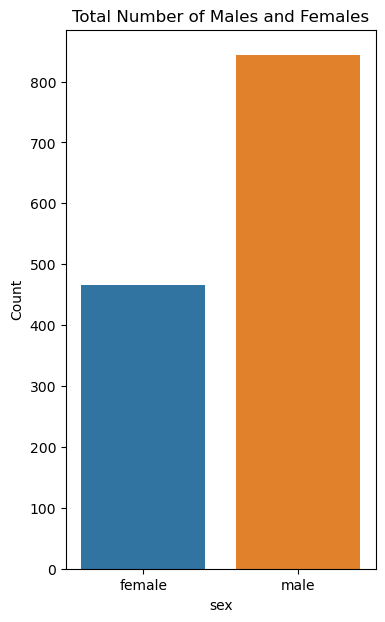

In [7]:
gender_counts = data['sex'].value_counts()
print("Gender Counts:\n", gender_counts)

plt.figure(figsize=(4,7))
sns.countplot(data=data, x='sex')
plt.title('Total Number of Males and Females')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

In [9]:
mean_fare = data['fare'].mean()
print("Average Mean Fare:", mean_fare)

Average Mean Fare: 33.29547928134557


Ticket Counts:
 ticket
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
Name: count, dtype: int64


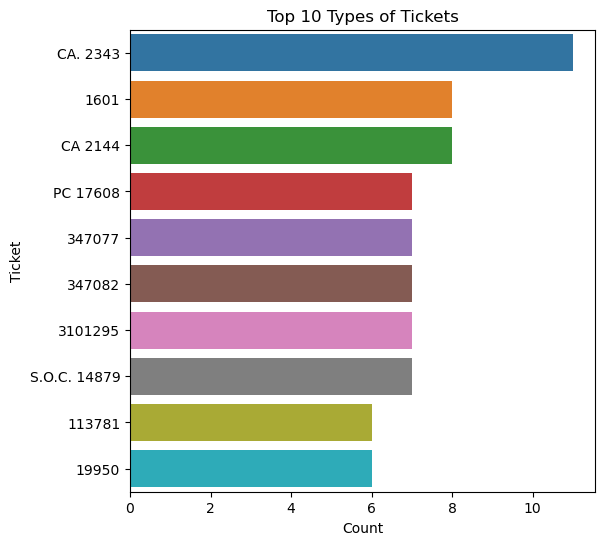

In [11]:
ticket_counts = data['ticket'].value_counts()
print("Ticket Counts:\n", ticket_counts.head())


plt.figure(figsize=(6, 6))
sns.countplot(data=data, y='ticket', order=data['ticket'].value_counts().index[:10])
plt.title('Top 10 Types of Tickets')
plt.xlabel('Count')
plt.ylabel('Ticket')
plt.show()


In [15]:
male_data = data[data['sex'] == 'male']
female_data = data[data['sex'] == 'female']
print("Male Data Sample:\n", male_data.head())
print("Female Data Sample:\n", female_data.head())

Male Data Sample:
    pclass  survived                                  name   sex    age  sibsp  \
1       1         1        Allison, Master. Hudson Trevor  male   0.92      1   
3       1         0  Allison, Mr. Hudson Joshua Creighton  male  30.00      1   
5       1         1                   Anderson, Mr. Harry  male  48.00      0   
7       1         0                Andrews, Mr. Thomas Jr  male  39.00      0   
9       1         0               Artagaveytia, Mr. Ramon  male  71.00      0   

   parch    ticket      fare    cabin embarked boat   body  \
1      2    113781  151.5500  C22 C26        S   11    NaN   
3      2    113781  151.5500  C22 C26        S  NaN  135.0   
5      0     19952   26.5500      E12        S    3    NaN   
7      0    112050    0.0000      A36        S  NaN    NaN   
9      0  PC 17609   49.5042      NaN        C  NaN   22.0   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
5         

In [16]:
home_dest_counts = data['embarked'].value_counts()
most_populated_home_dest = home_dest_counts.idxmax()
least_populated_home_dest = home_dest_counts.idxmin()

print("Most Populated Home Destination:", most_populated_home_dest)
print("Least Populated Home Destination:", least_populated_home_dest)

Most Populated Home Destination: S
Least Populated Home Destination: Q


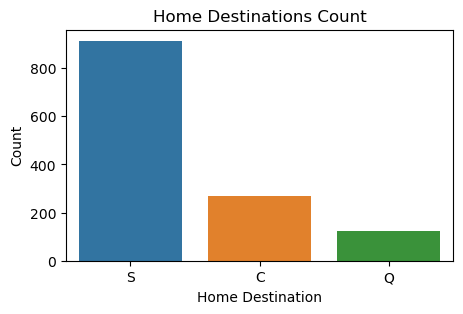

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='embarked')
plt.title('Home Destinations Count')
plt.xlabel('Home Destination')
plt.ylabel('Count')
plt.show()

In [20]:
total_parch = data['parch'].sum()
print(f"Total number of parents/children aboard: {total_parch}")

Total number of parents/children aboard: 504


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic_df = data.copy()

In [24]:
data['embarked'] = data['embarked'].map({'C': 1, 'S': 2, 'Q': 3})
correlation = data['survived'].corr(data['embarked'])
print(f"Correlation between 'Survived' and 'Embarked': {correlation}")

Correlation between 'Survived' and 'Embarked': -0.14674473315309627


In [25]:
correlation = data['pclass'].corr(data['embarked'])
print(f"Correlation between 'pclass' and 'Embarked': {correlation}")

Correlation between 'pclass' and 'Embarked': 0.32996060742621347
